<a href="https://colab.research.google.com/github/Punnawit123/-_-/blob/main/%E0%B8%82%E0%B8%AB%E0%B8%A5%E0%B8%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart (1).csv


In [30]:
from scipy.io import loadmat
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd

In [31]:
walmart = pd.read_csv("/content/Walmart.csv")                                        
walmart_df=pd.DataFrame(walmart)
walmart.info()
walmart_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Axes(0.125,0.11;0.168478x0.77)
Axes(0.327174,0.11;0.168478x0.77)
Axes(0.529348,0.11;0.168478x0.77)
Axes(0.731522,0.11;0.168478x0.77)


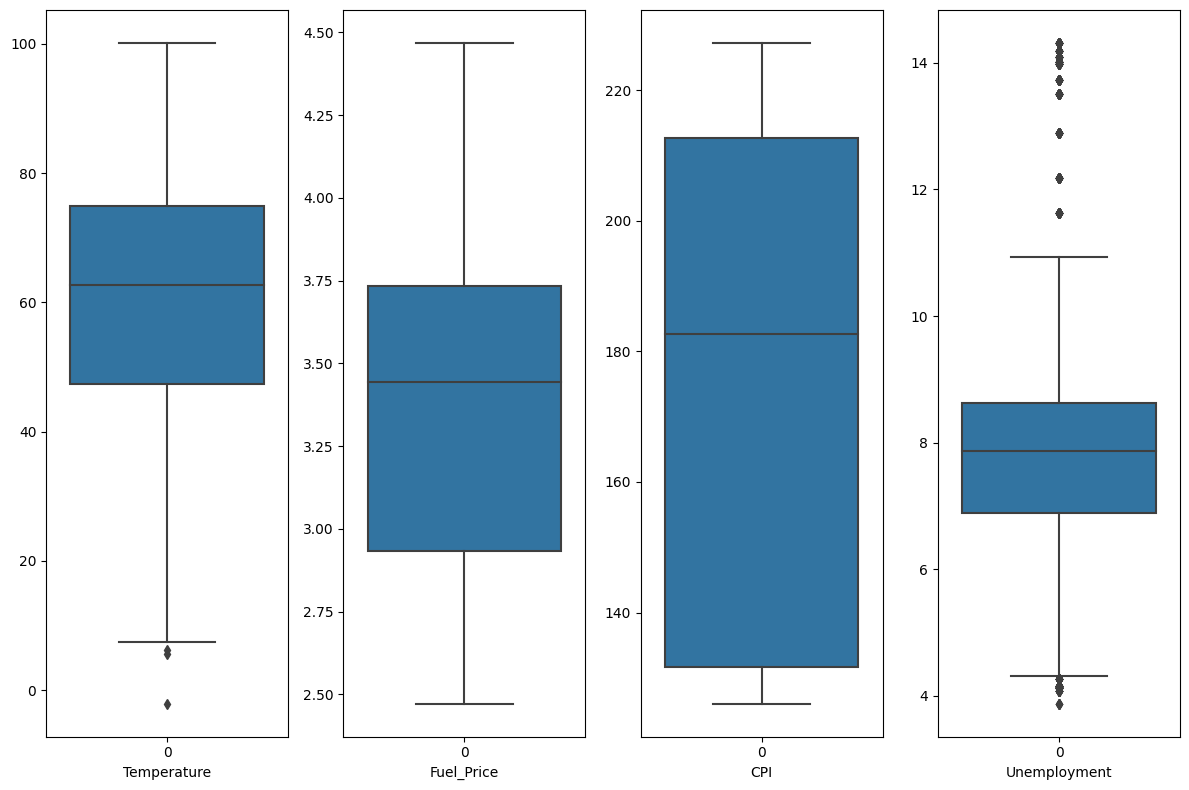

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

walmart_df_plot1 = walmart_df
cols_to_plot = ['Temperature', 'Fuel_Price','CPI','Unemployment']

# for i in cols_to_plot:
#  fig, axes = plt.subplots( figsize=(10, 15))
#  sns.boxplot(data=walmart_df[i],)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))                     # figure and axes = 1*4 array
for i, ax in zip(cols_to_plot, axes.flat):                                      # axes.flat
    sns.boxplot(data=walmart_df[i], ax=ax)
    ax.set_xlabel(i)
    print(ax)

plt.tight_layout()
 
# plt.show()
# sns.pairplot(walmart_df_plot1[cols_to_plot])

IQR 6432
IQR 6435
IQR 6435
IQR 5954
z 6434
z 6435
z 6435
z 6216
z__plus 5953
z__plus 5954
z__plus 5954
z__plus 5954
IQR_plus 6215
IQR_plus 6216
IQR_plus 6216
IQR_plus 5915


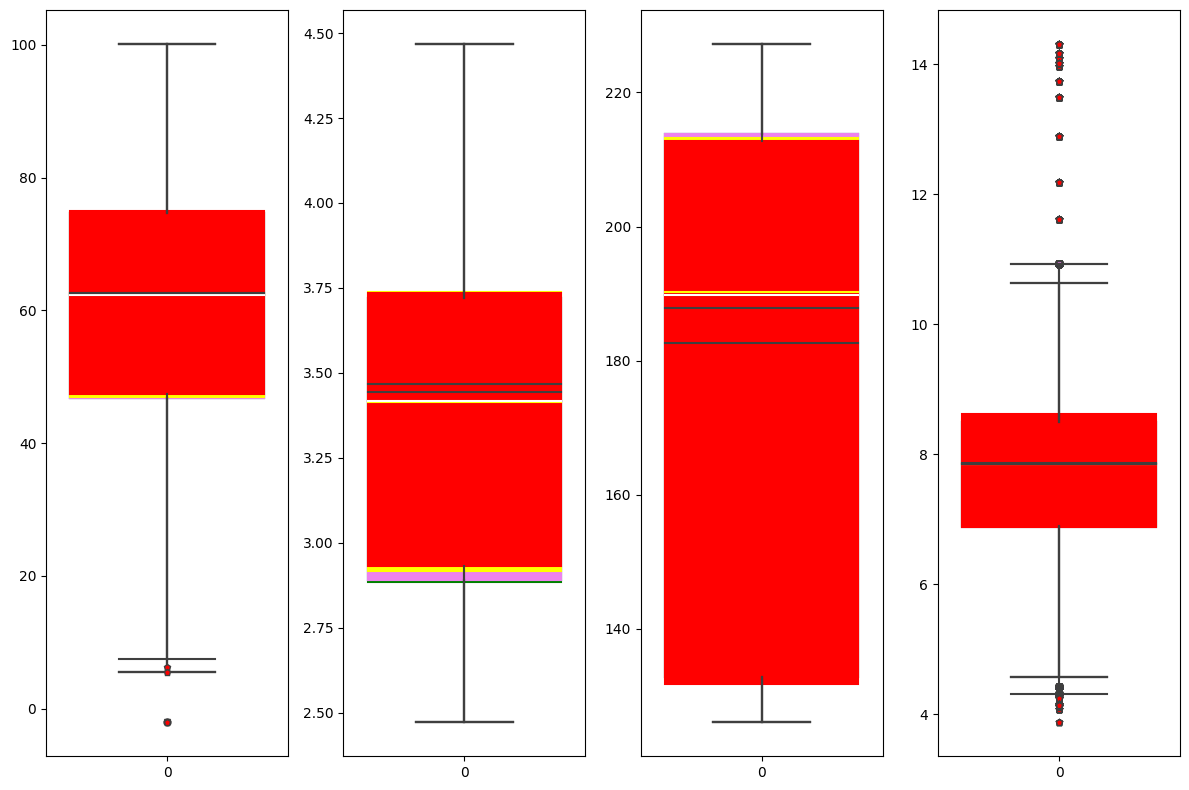

In [33]:
from scipy import stats


for col in cols_to_plot:
  Q1 = walmart_df[col].quantile(0.25)
  Q3 = walmart_df[col].quantile(0.75)
  IQR = Q3 - Q1
  filter = (walmart_df[col] < Q1 - 1.5 * IQR) | (walmart_df[col] > Q3 + 1.5 * IQR)
  walmart_df_new = walmart_df.drop(walmart_df[filter].index)
  # print(walmart_df_new[i].shape)
  # print(IQR)
  print("IQR",f'{len(walmart_df_new[i])}')
  # sns.boxplot(data=walmart_df_new[i])


for i in cols_to_plot:
  z = stats.zscore(walmart_df[i])
  absz=np.abs(z)
  outline = absz > 3
  walmart_df_z = walmart_df.drop(walmart_df[outline].index)                        #  We use the .index method to extract the labels or indices of these rows
  print("z",f'{len(walmart_df_z[i])}')

for i in cols_to_plot:
  z = stats.zscore(walmart_df_new[i])
  absz=np.abs(z)
  outline = absz > 3
  walmart_df_z_plus = walmart_df_new.drop(walmart_df_new[outline].index)                        #  We use the .index method to extract the labels or indices of these rows
  print("z__plus",f'{len(walmart_df_z_plus[i])}')

for col in cols_to_plot:
  Q1 = walmart_df_z[col].quantile(0.25)
  Q3 = walmart_df_z[col].quantile(0.75)
  IQR = Q3 - Q1
  filter = (walmart_df_z[col] < Q1 - 1.5 * IQR) | (walmart_df_z[col] > Q3 + 1.5 * IQR)
  walmart_df_new_plus = walmart_df_z.drop(walmart_df_z[filter].index)
  # print(walmart_df_new[i].shape)
  # print(IQR)
  print("IQR_plus",f'{len(walmart_df_new_plus[i])}')
  # sns.boxplot(data=walmart_df_new[i])



# for i in cols_to_plot:
#  fig, ax = plt.subplots()
#  ax.boxplot(walmart_df_new[i].values,boxprops={'color': 'blue'},flierprops=dict(markerfacecolor='blue', marker='o'),medianprops=dict(color='blue'))
#  ax.boxplot(walmart_df_new_plus[i].values,boxprops={'color': 'green'},flierprops=dict(markerfacecolor='green', marker='.'),medianprops=dict(color='blue'))
#  ax.boxplot(walmart_df_z_plus[i].values,boxprops={'color': 'violet'},flierprops=dict(markerfacecolor='violet', marker='v'))      
#  ax.boxplot(walmart_df_z[i].values,boxprops={'color': 'yellow'},flierprops=dict(markerfacecolor='yellow', marker='*'))      
#  ax.boxplot(walmart_df[i].values,boxprops={'color': 'red'},flierprops=dict(markerfacecolor='red', marker='p'))
 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))                     # figure and axes = 1*4 array
for i, ax in zip(cols_to_plot, axes.flat):                                      # axes.flat
    sns.boxplot(walmart_df_new[i].values,boxprops={'color': 'blue'},flierprops=dict(markerfacecolor='blue', marker='o'),ax=ax)
    sns.boxplot(walmart_df_new_plus[i].values,boxprops={'color': 'green'},flierprops=dict(markerfacecolor='green', marker='.'),medianprops=dict(color='yellow'),ax=ax)
    sns.boxplot(walmart_df_z_plus[i].values,boxprops={'color': 'violet'},flierprops=dict(markerfacecolor='violet', marker='v'),medianprops=dict(color='white'),ax=ax)      
    sns.boxplot(walmart_df_z[i].values,boxprops={'color': 'yellow'},flierprops=dict(markerfacecolor='yellow', marker='*'),ax=ax)      
    sns.boxplot(walmart_df[i].values,boxprops={'color': 'red'},flierprops=dict(markerfacecolor='red', marker='p'),ax=ax)

plt.tight_layout()

# yellow  = z , blue = IQP , red = origi


In [34]:
walmart_df_new_plus_model=walmart_df_new_plus.drop(["Date"], axis = 1)
walmart_df_z_plus_model=walmart_df_z_plus.drop(["Date"], axis = 1)
walmart_df_new_model=walmart_df_new.drop(["Date"], axis = 1)
walmart_df_z_model=walmart_df_z.drop(["Date"], axis = 1)
walmart_df_model=walmart_df.drop(["Date"], axis = 1)


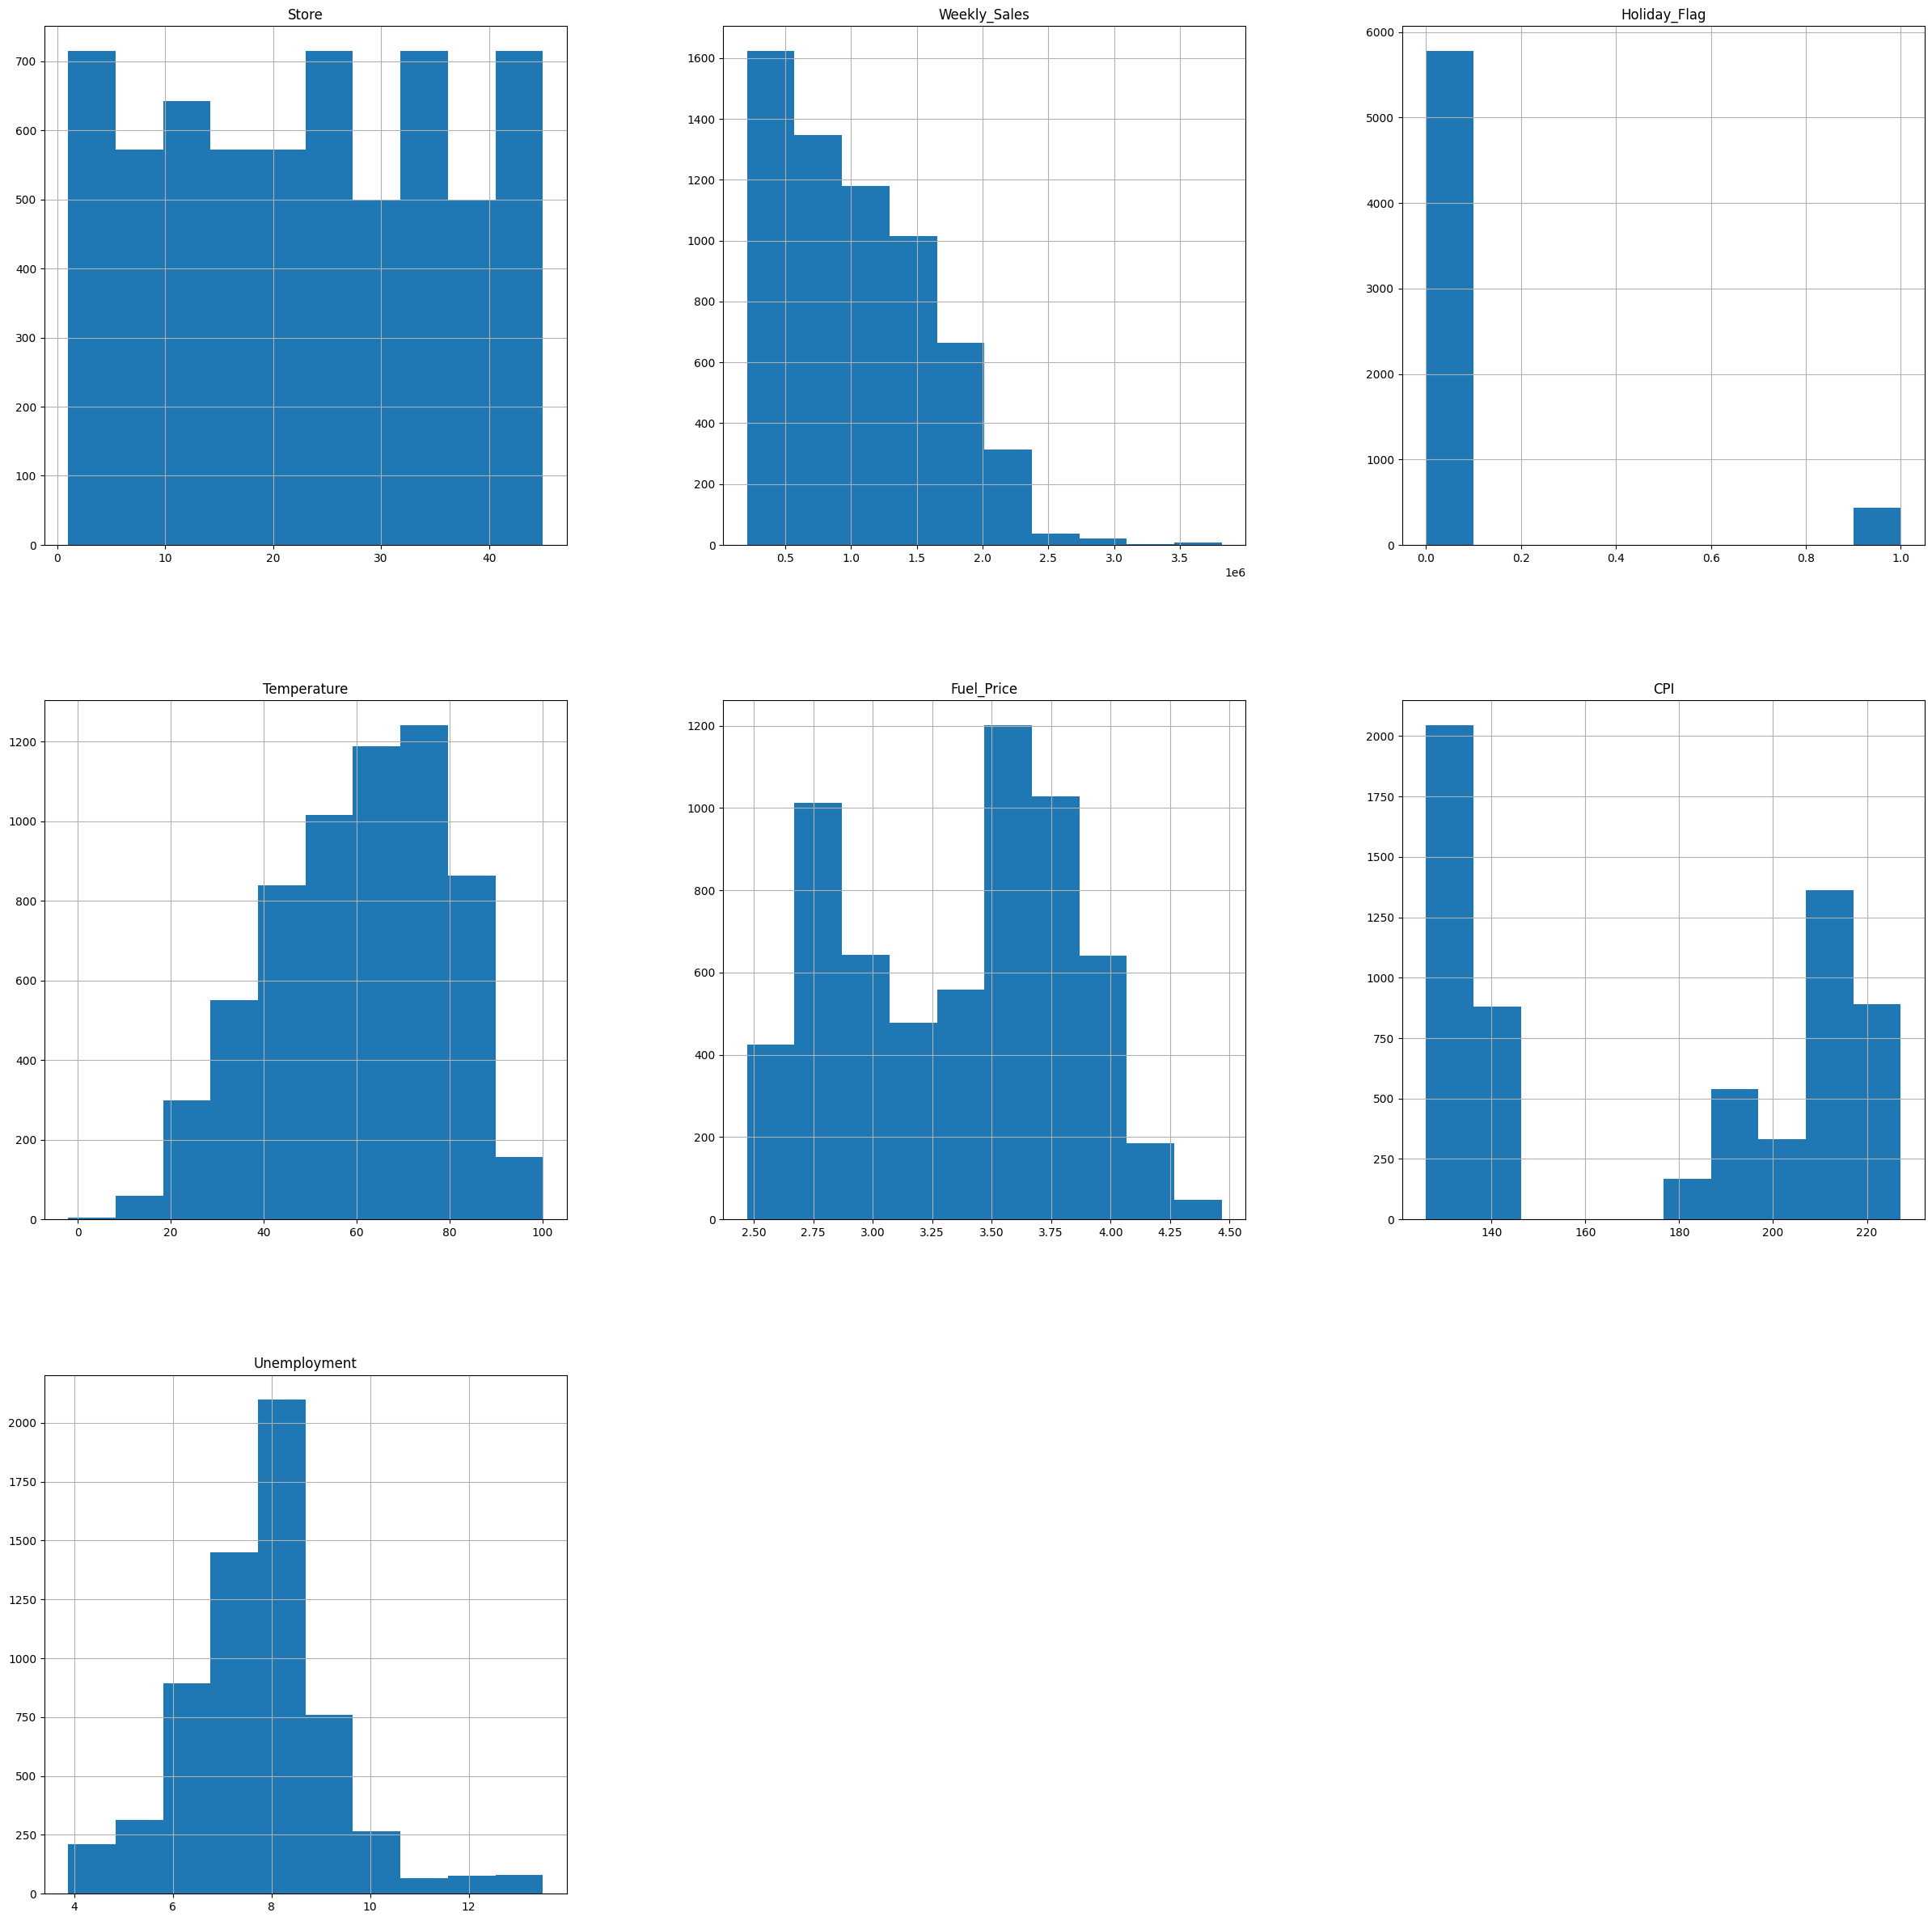

In [35]:
walmart_df_z_model.hist(figsize=(30,30))
plt.show()

<Axes: >

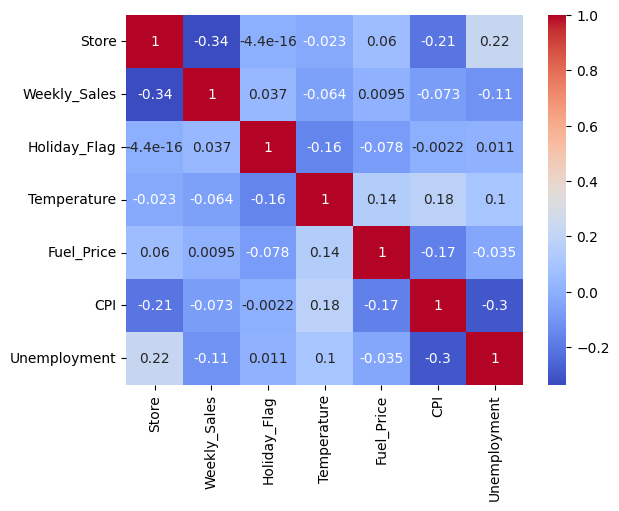

In [36]:
correlation1 = walmart_df_model.corr()
sns.heatmap(correlation1, annot=True, cmap="coolwarm")

<Axes: >

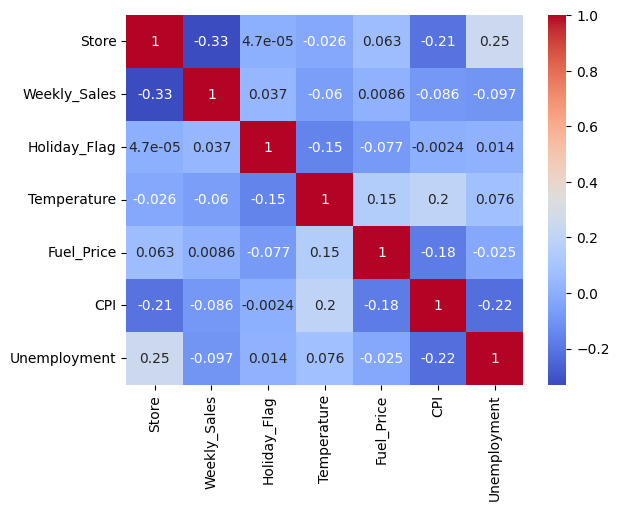

In [37]:
correlation2 = walmart_df_z_model.corr()
sns.heatmap(correlation2, annot=True, cmap="coolwarm")

<Axes: >

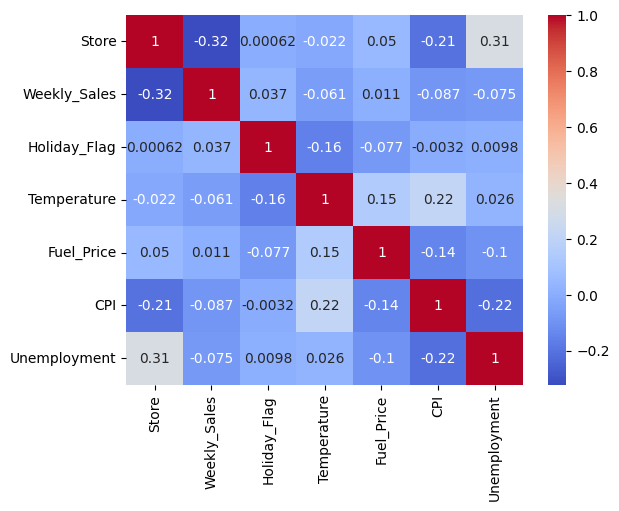

In [38]:
correlation3 = walmart_df_new_model.corr()
sns.heatmap(correlation3, annot=True, cmap="coolwarm")

<Axes: >

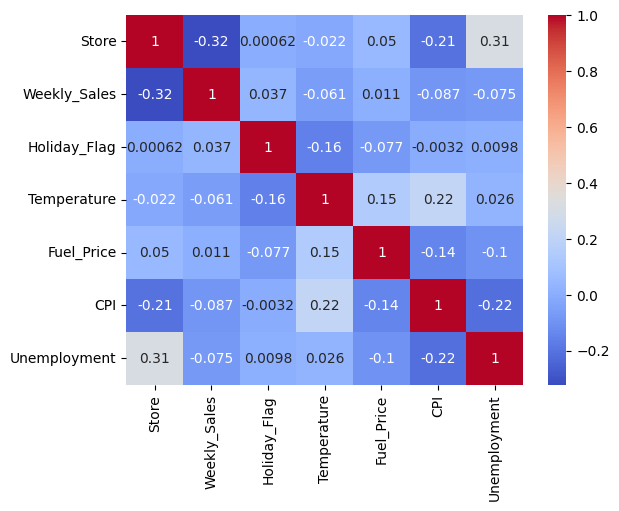

In [39]:
correlation4 = walmart_df_z_plus_model.corr()
sns.heatmap(correlation4, annot=True, cmap="coolwarm")

<Axes: >

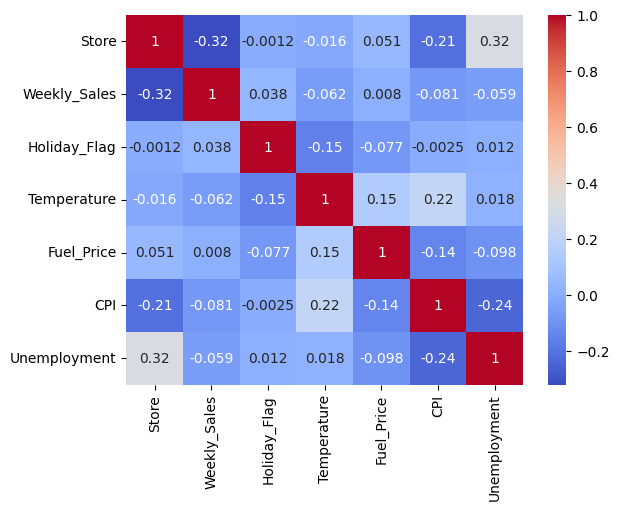

In [40]:
correlation5 = walmart_df_new_plus_model.corr()
sns.heatmap(correlation5, annot=True, cmap="coolwarm")

In [41]:
X1 = walmart_df_z_model.drop(['Weekly_Sales'], axis=1)          #rmse 531336.6807442799  cross: 565620.4142125826
Y1 = walmart_df_z_model['Weekly_Sales']
X2 =  walmart_df_new_model.drop('Weekly_Sales', axis=1)       #rmse 534328.2423466882  cross: 573586.3362180571
Y2 =  walmart_df_new_model['Weekly_Sales']
X3 =  walmart_df_new_plus_model.drop('Weekly_Sales', axis=1)  #rmse 545344.0193303302  cross: 572811.9288285673
Y3 =  walmart_df_new_plus_model['Weekly_Sales']
X4 =  walmart_df_z_plus_model.drop('Weekly_Sales', axis=1)    #rmse 537239.6834755522  cross: 573586.3362180571
Y4 =  walmart_df_z_plus_model['Weekly_Sales']

from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()
# X1_scaled = scaler.fit_transform(X1)
# X2_scaled = scaler.fit_transform(X2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
# from sklearn.decomposition import PCA

rmse_scorer = make_scorer(mean_squared_error, squared=False)
X_train,X_test,Y_train,Y_test= train_test_split(X1, Y1, test_size=0.25,random_state=0)
# pca=PCA(.95)
# X_train=pca.fit_transform(X_train)
# print(X_train.shape)



model=LinearRegression()
model.fit(X_train,Y_train)
rmse_cross = cross_val_score(model, X1, Y1, cv=10, scoring=rmse_scorer)
# print(print("Mean RMSE:", rmse_cross.mean()))
# print(model.coef_)
# print(model.intercept_)

y_pred=model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
print("cross:",rmse_cross.mean())


from sklearn.metrics import r2_score
r2 = r2_score(Y_test,y_pred)
# plt.plot(Y_test,color="red")
# plt.plot(y_pred)
# plt.xlabel("Y_test")
# plt.ylabel("y_pred")
# plt.show()
print("r school:",r2)


RMSE: 531336.6807442799
cross: 565620.4142125826
r school: 0.1594090874446259


In [63]:
# model.predict(X1[1])
print(Y_test[:5])
print(y_pred[:5])
print(walmart_df_new_model.iloc[2307])

2307     877996.27
5176     486930.72
2787    2135062.04
6088     594224.90
2214     531080.31
Name: Weekly_Sales, dtype: float64
[1255559.65847628  710554.05037783 1005677.20883936  606343.39485028
 1130138.4708189 ]
Store           1.800000e+01
Weekly_Sales    1.183226e+06
Holiday_Flag    0.000000e+00
Temperature     6.596000e+01
Fuel_Price      2.805000e+00
CPI             1.324733e+02
Unemployment    9.269000e+00
Name: 2450, dtype: float64


In [64]:
from sklearn.linear_model import Ridge           # 531337.5946442588

R_model=Ridge(alpha=0.5)
R_model.fit(X_train,Y_train)
y_pred=R_model.predict(X_test)
Rmse = mean_squared_error(Y_test,y_pred)
Rrmse=np.sqrt(Rmse)
# print(Rrmse)
print(Y_test[:5])
print(y_pred[:5])

2307     877996.27
5176     486930.72
2787    2135062.04
6088     594224.90
2214     531080.31
Name: Weekly_Sales, dtype: float64
[1255567.44127877  710559.42273108 1005678.35885299  606346.42424722
 1130142.59285491]


In [66]:
from sklearn.linear_model import Lasso           # 531337.5946442588
La_model=Lasso(alpha=0.5)
La_model.fit(X_train,Y_train)
y_pred=La_model.predict(X_test)
Lmse = mean_squared_error(Y_test,y_pred)
Lrmse=np.sqrt(Lmse)
# print(Lrmse)
print(Y_test[:5])
print(y_pred[:5])

2307    877996.27
Name: Weekly_Sales, dtype: float64
[1255559.65847628]


In [72]:
from sklearn.tree import DecisionTreeRegressor     
# 533513.9926795835
499679.99218292907
412733.8402509093
360406.7557884677
322555.33855448785
283206.28246531624
250804.08217510374
202531.56941510082
171369.34916101492
168349.00779500144
175016.20812674143
177739.1420384209
179909.26958871412
187991.21326258357
186446.88739707516
188836.16424480712
194346.1573973137
193601.16861134156
189234.86042049393
193174.86055788698
195479.66908831988
191587.6251522301
191015.45046559465
191763.9936087241
191371.2379677354
for i in range(1,26):
  tree_model = DecisionTreeRegressor(max_depth=i)
  tree_model.fit(X_train, Y_train)
  y_pred=tree_model.predict(X_test)
  tmse = mean_squared_error(Y_test,y_pred)
  trmse=np.sqrt(tmse)
  # print(f"{i}:{trmse}")
  # rmse_scores = np.sqrt(-cross_val_score(tree_model, X1, Y1, scoring="neg_mean_squared_error", cv=10))
  # print(f"{i}:{rmse_scores()}")
  print(f"{i}::::::::::::::::::::::::::::::::{Y_test[:1]}:::::{y_pred[:1]}")


1::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[1218100.56176573]
2::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[1399833.12414871]
3::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[1186200.48352239]
4::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[865531.73672673]
5::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[982556.57611607]
6::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[885449.46958333]
7::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[853829.35967213]
8::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[850008.66333333]
9::::::::::::::::::::::::::::::::2307    877996.27
Name: Weekly_Sales, dtype: float64:::::[877023.92875]
10::::::::::::::::::::::::::

In [73]:
from sklearn.ensemble import RandomForestRegressor                            #722768.1563479372

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred=model.predict(X_test)
# tmse = mean_squared_error(Y_test,y_pred)
# trmse=np.sqrt(tmse)
# Lrmse=np.sqrt(Lmse)
# rmse_scores = np.sqrt(-cross_val_score(rf_model, X1, Y1, scoring="neg_mean_squared_error", cv=10))
# print(rmse_scores.mean())
print(Y_test[:1])
print(y_pred[:1])

2307    877996.27
Name: Weekly_Sales, dtype: float64
[1255557.67609051]
